In [13]:
import tensorflow as tf
import cv2
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
%matplotlib  inline

In [14]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8739423353053525451
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 362807296
locality {
  bus_id: 1
}
incarnation: 5314673303102699320
physical_device_desc: "device: 0, name: TITAN Xp, pci bus id: 0000:01:00.0, compute capability: 6.1"
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 394264576
locality {
  bus_id: 1
}
incarnation: 11230578379218374169
physical_device_desc: "device: 1, name: TITAN Xp, pci bus id: 0000:03:00.0, compute capability: 6.1"
]


In [136]:
daisy = 'flowers/daisy/*.jpg'
dandalion = 'flowers/dandelion/*.jpg'
rose = 'flowers/rose/*.jpg'
sunflower = 'flowers/sunflower/*.jpg'
tulip = 'flowers/tulip/*.jpg'

In [137]:
import glob
import os

def read_img(path, label):
    image_stack = []
    labels = []
    #name = str(path)
    for img in glob.glob(path):
        #f = img.find("/")+1
        
        labels.append(label)
        image = cv2.imread(img)
        img_res = cv2.resize(image, (128, 128), cv2.INTER_LINEAR)
        image_stack.append(img_res)
        #image_stack = np.asarray(image_stack)
    return (image_stack), labels


In [138]:
data = {0:'flowers/daisy/*.jpg', 1:'flowers/dandelion/*.jpg', 2:'flowers/rose/*.jpg', 
        3:'flowers/sunflower/*.jpg',4:'flowers/tulip/*.jpg' }
#targets = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

dataset = []
labels = []
for key, path in data.items():
    images, label = read_img(path, key)
    dataset += images
    labels += label
dataset = np.asarray(dataset)
labels = np.asarray(labels)

In [139]:
print('Dataset shape:',dataset.shape)
print('Labels shape:',labels.shape)

Dataset shape: (4323, 128, 128, 3)
Labels shape: (4323,)


In [140]:
target = {0:'daisy', 1:'dandelion', 2:'rose', 3:'sunflower', 4:'tulip'}

In [141]:
from sklearn.model_selection import train_test_split
from random import *

In [142]:
X_tr, X_te, Y_tr, Y_te = train_test_split(dataset, labels, test_size = 0.1, random_state=0)

In [143]:
Y_tr.shape

(3890,)

In [144]:
import matplotlib.gridspec as gridspec
def plot_dataset(X, Y, target, samples):
    l = len(X)
    n = 0
    gs = gridspec.GridSpec(10, 6)
    plt.figure(figsize=(25, 30))
    for i in range(samples):
        ax = plt.subplot(gs[n])
        index = randint(1, l)
        image = X[index]
        label = target[Y[index]]
        n+=1
        plt.text(0, -2, label)
        plt.imshow(image)
    #plt.imshow()

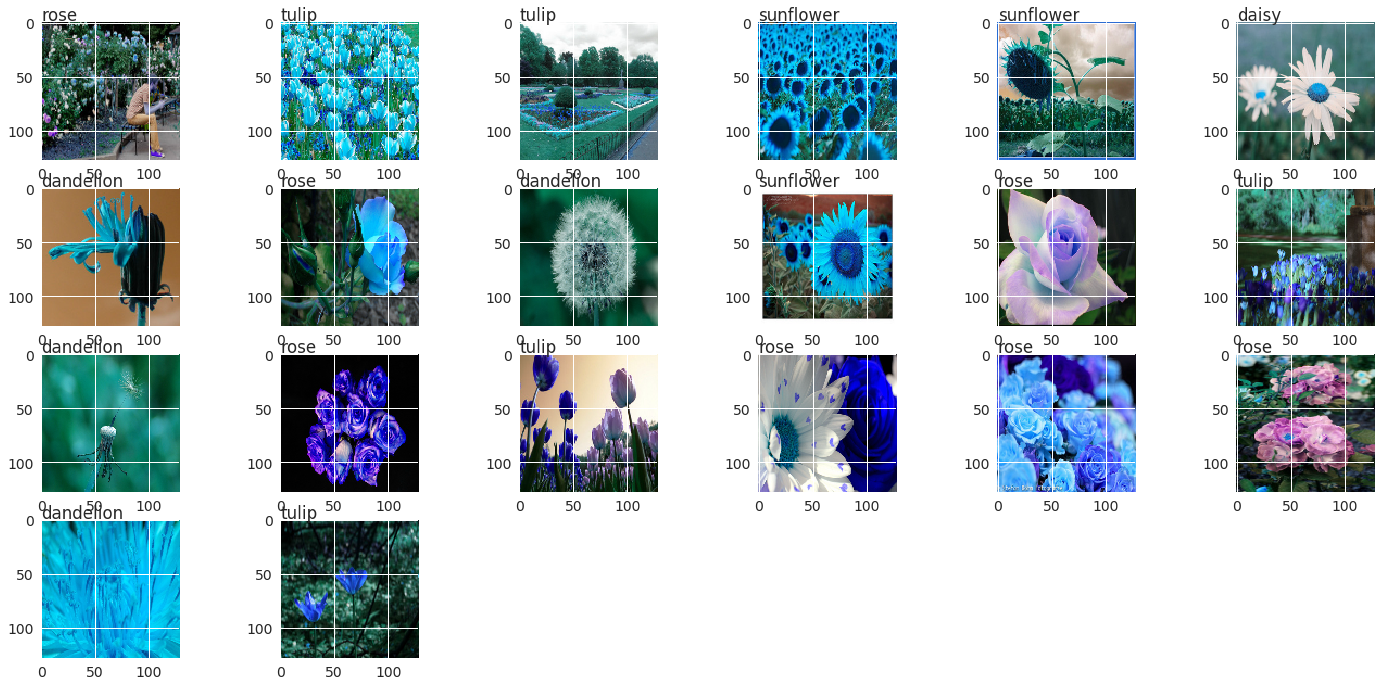

In [94]:
plot_dataset(X_tr, Y_tr, target, 20)

In [95]:
#Buiding my model
from IPython.display import Image
Image(url='http://www.nallatech.com/wp-content/uploads/CNN-Figure-02.png')

In [145]:
from keras.layers import MaxPooling2D, Dropout, Activation
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, Conv2D

In [97]:
def normalization(img):
    img = cv2.normalize(img, img, 50, 200, cv2.NORM_MINMAX)
    cv2.medianBlur(img, 3)
    return img

In [98]:
l = len(X_tr)
l2 = len(X_te)
for i in range(l):
    X_tr[i] = normalization(X_tr[i])
for i in range(l2):
    X_te[i] = normalization(X_te[i])

In [146]:
def CNN():
    #K.clear_session()
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_tr.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
   
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dense(n_classes))
   
    
    return model
        
    

In [147]:


feat = X_tr.shape[1]
n_classes = len(set(Y_tr))
channels = X_tr.shape[3]
Y_tr = to_categorical(Y_tr, n_classes)
Y_te = to_categorical(Y_te, n_classes)


In [148]:
learning_rate = 8e-4
model = CNN()
model.add(Activation('softmax'))

In [149]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
activation_34 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_35 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_36 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 124, 124, 32)      9248      
__________

In [150]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [151]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, shear_range=0.2,
                        height_shift_range=0.2, zoom_range=0.2, rescale=1./255, horizontal_flip=True,
        fill_mode='nearest' )

In [152]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-6,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None)

In [153]:
test_gen = ImageDataGenerator()
batch_size = 32

In [154]:
train_generator = gen.flow(X_tr, Y_tr, batch_size=batch_size)
test_generator = test_gen.flow(X_te, Y_te, batch_size=batch_size)

In [155]:
history = model.fit_generator(train_generator, steps_per_epoch=X_tr.shape[0]//batch_size, epochs=9, 
                   validation_data=test_generator, validation_steps=X_te.shape[0]//batch_size)

Epoch 1/9
121/121 [==============================] - 6s 51ms/step - loss: 1.7502 - acc: 0.2707 - val_loss: 1.5027 - val_acc: 0.3438
Epoch 2/9
121/121 [==============================] - 6s 49ms/step - loss: 1.4414 - acc: 0.3675 - val_loss: 1.3571 - val_acc: 0.4040
Epoch 3/9
121/121 [==============================] - 6s 48ms/step - loss: 1.3075 - acc: 0.4546 - val_loss: 1.2475 - val_acc: 0.4913
Epoch 4/9
121/121 [==============================] - 6s 48ms/step - loss: 1.1454 - acc: 0.5343 - val_loss: 1.2019 - val_acc: 0.5312
Epoch 5/9
121/121 [==============================] - 6s 48ms/step - loss: 1.0072 - acc: 0.5956 - val_loss: 1.0161 - val_acc: 0.5761
Epoch 6/9
121/121 [==============================] - 6s 48ms/step - loss: 0.8142 - acc: 0.6764 - val_loss: 1.0495 - val_acc: 0.5711
Epoch 7/9
121/121 [==============================] - 6s 47ms/step - loss: 0.6599 - acc: 0.7432 - val_loss: 1.1667 - val_acc: 0.5611
Epoch 8/9
121/121 [==============================] - 6s 48ms/step - loss: 0.

In [156]:
test = model.evaluate(X_te, Y_te)
print('Testing results:{} {}'.format(test[0],100*test[1]))

433/433 [==============================] - 0s 547us/step
Testing results:1.4596990096376343 60.27713635501905


In [157]:

from sklearn.metrics import classification_report, confusion_matrix

In [158]:
Y_pred = model.predict(X_te, verbose=2)
y_pred = np.argmax(Y_pred, axis =1)

In [159]:
for i in range(5):
    print(i, confusion_matrix(np.argmax(Y_te, axis=1), y_pred)[i].sum())
cm = confusion_matrix(np.argmax(Y_te, axis=1), y_pred)
print(cm)

0 76
1 92
2 76
3 78
4 111
[[43  8  7  7 11]
 [ 5 63  6  8 10]
 [ 1  7 14  6 48]
 [ 1  9  2 58  8]
 [ 3  7 17  1 83]]


In [160]:
import seaborn as sb

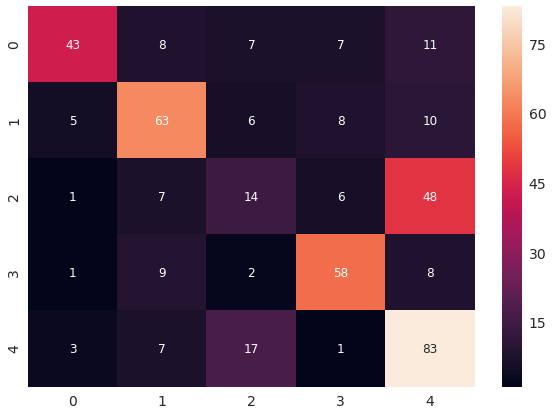

In [161]:
df = pd.DataFrame(cm, range(5), range(5))
plt.figure(figsize=(10, 7))
sb.set(font_scale=1.4)
sb.heatmap(df, annot=True, annot_kws={"size":12})
plt.show()

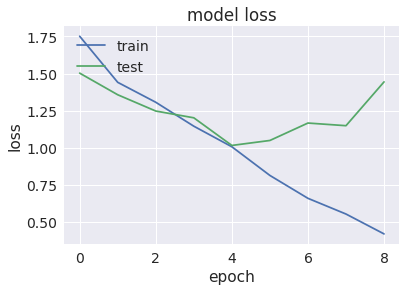

In [162]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

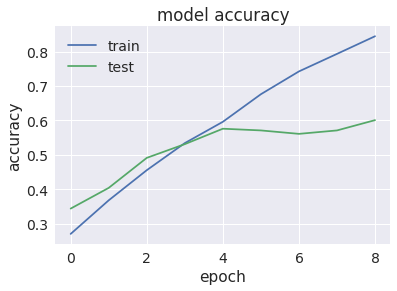

In [163]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()